<img src="Slide4.JPG">

In this Session we will build a portfolio of stocks following the next steps:
<ol>
<li>   Download historical prices</li>
<li>   Create plots and inspect price behavior</li>
<li>   Calculate Returns</li>
<li>   Calculate Risk (aka volatility, aka standard deviation)</li>
<li>   Compare them as alternative investment options</li>
<li>   Compare them with S&P 500 Index</li>
<li>   Derive conclusions</li>
<li>   Construct a very simple portfolio "Maria's" ($1000 USD investment simulation starting in year 2020).</li>
<li>   Calculate performance metrics: returns, risk, sharpe ratio and maximum drawdown.</li>
<li>   Compare performance metrics of the "Maria's" portfolio aginst a single stock and agains the S&P500 Index.</li>
<li>   Analyze correlation and its implications for portfolio construction.</li>
</ol>
     
<hr>

1. Let's start by learning how to pull data from Yahoo Finance

In [1]:
# Python requires to import some libraries, don't worry about these yet
from pandas_datareader import data as pdr
import pandas as pd
import matplotlib.pyplot as pl
import datetime as dt
import numpy as np # For numerical operations e.g. logarithm

# Display only two decimals to avoid distraction
pd.set_option('display.precision', 2)

In [2]:
# Let's set a start date for our analysis and let's get data upto today
start_date = dt.date(2000,1,1)
end_date = dt.date.today()
stock_data = pd.DataFrame(pdr.get_data_yahoo('TSLA',start_date, end_date)['Adj Close'])
stock_data

,Adj Close
Date,
2010-06-29,4.78
2010-06-30,4.77
2010-07-01,4.39
2010-07-02,3.84
2010-07-06,3.22
...,...
2021-10-14,818.32
2021-10-15,843.03
2021-10-18,870.11


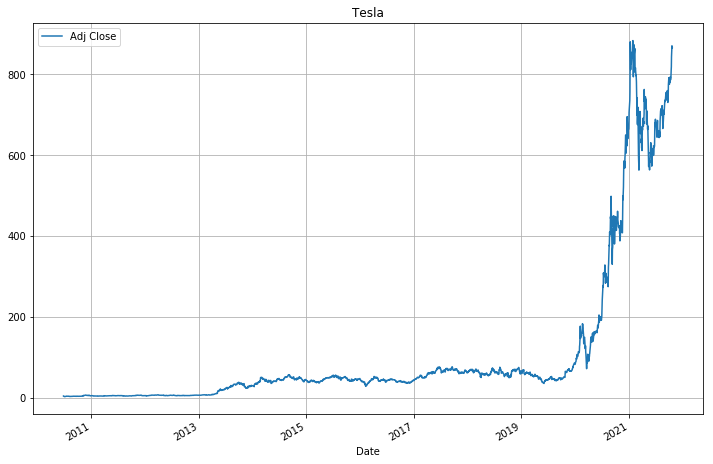

In [3]:
stock_data.plot(grid=True, figsize=(12,8), title='Tesla');

In [4]:
# Let's get data on 2 other stocks and on the S&P 500 index
names = ['S&P500','Microsoft','Walmart','Amazon']
tickers = ['^GSPC','MSFT','WMT','AMZN']
stock_prices = pd.DataFrame(pdr.get_data_yahoo(tickers,start_date, end_date)['Adj Close'])
stock_prices.columns = names
stock_prices

,S&P500,Microsoft,Walmart,Amazon
Date,,,,
2000-01-03,1455.22,36.86,45.10,89.38
2000-01-04,1399.42,35.62,43.41,81.94
2000-01-05,1402.11,35.99,42.52,69.75
2000-01-06,1403.45,34.79,42.99,65.56
2000-01-07,1441.47,35.24,46.24,69.56
...,...,...,...,...
2021-10-14,4438.26,302.75,139.87,3299.86
2021-10-15,4471.37,304.21,140.55,3409.02
2021-10-18,4486.46,307.29,141.68,3446.74


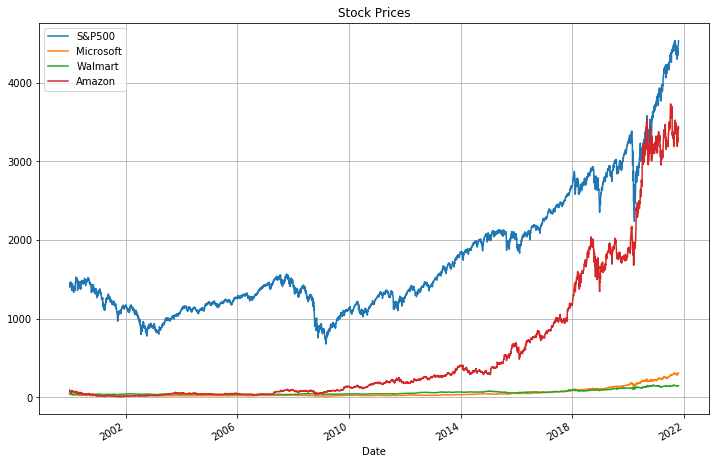

In [5]:
stock_prices.plot(grid=True, figsize=(12,8), title='Stock Prices');

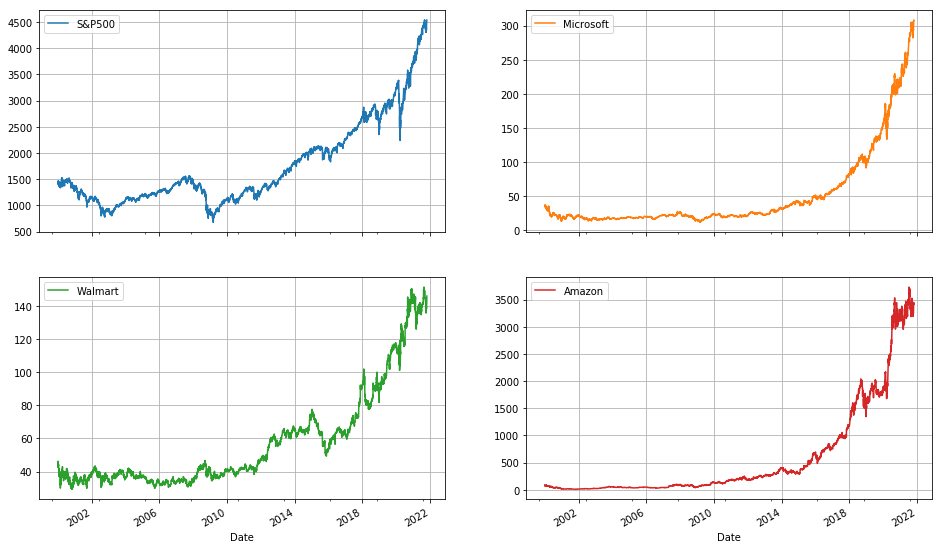

In [6]:
stock_prices.plot(subplots=True,layout=(2,2),grid=True,figsize=(16,10));

<b> Problem: </b><br>
We can't really compare these 3 stocks just looking at their price plots. <br>
For instance, we don't know which one has increased most. <br>
This is why we need <b>Returns</b>.

<p> 2. Now, let's review the concept of return

<img src="Slide5.JPG">

<img src="Slide6.JPG">

Let's use some math:

# Return over one period

$ \Large return = \frac{P_2-P_1}{P_1} = \frac{P_2}{P_1} - 1$

And now some code:

In [7]:
indexed_return = stock_prices.iloc[-1]  / stock_prices.iloc[0]
indexed_return.name = 'Indexed Return'
print (indexed_return)
print ()

total_return = (stock_prices.iloc[-1] - stock_prices.iloc[0]) / stock_prices.iloc[0]
total_return.name = 'Total Return'
print (total_return)

print ()
percentage_return = 100 * (stock_prices.iloc[-1] - stock_prices.iloc[0]) / stock_prices.iloc[0]
percentage_return.name = 'Percentage Return'
print (percentage_return.map('{:,.2f} %'.format))
#print ('{:2.2%}'.format(percentage_return))

S&P500        3.12
Microsoft     8.34
Walmart       3.24
Amazon       38.21
Name: Indexed Return, dtype: float64

S&P500        2.12
Microsoft     7.34
Walmart       2.24
Amazon       37.21
Name: Total Return, dtype: float64

S&P500         211.72 %
Microsoft      733.96 %
Walmart        223.75 %
Amazon       3,721.05 %
Name: Percentage Return, dtype: object


# Calculating returns:

$ \Large return = \frac{P_1}{P_0} - 1 = \frac{P_1-P_0}{P_0} $

### Multi-period returns, how do we aggregate them:

$  \Large {Total Return} = \frac{P_2}{P_1}*\frac{P_3}{P_2}*...*\frac{P_n}{P_{n-1}} - 1$

$ = (1+r_1)*(1+r_2)*...*(1+r_n) - 1$

$ or $

$ \Large \prod_1^n {(1 + ret_i)} - 1 $


### Sometimes it's useful to work with logarithmic returns

$ logreturn = ln \frac{P_1}{P_0} = ln (P_1) - ln (P_0) $

$ e^ {\sum (logret_i)} - 1$


In [15]:
#Calculating more returns

#returns = price_1/price_0 -1
returns = stock_prices.pct_change()

#log_returns
log_rets = np.log(stock_prices) - np.log(stock_prices.shift())

def rets2prices(r):
    prices = (1+r).cumprod()
    prices.iloc[0,:] = 1
    return prices

def calc_returns(rets):
    log_rets = np.log(1 + rets)
    # Simpe addition
    cum_rets = rets.cumsum()
    # Log addition
    cum_logrets = np.exp(log_rets.cumsum()) - 1
    # Additional types of returns
    indexed_returns = rets2prices(rets)
    money_returns = indexed_returns * 1000

    return log_rets, cum_rets, cum_logrets, indexed_returns, money_returns

log_rets, cum_rets, cum_logrets, indexed_returns, money_returns = calc_returns(returns)

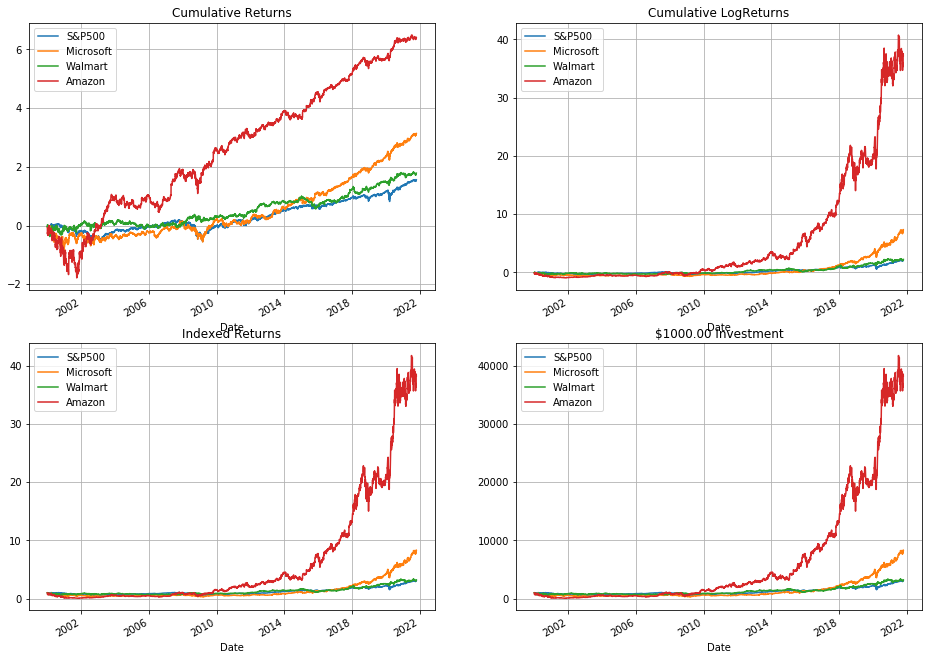

In [10]:
# Plots of returns
fig = pl.figure(figsize=(16,12))
ax1 = pl.subplot(221)
ax2 = pl.subplot(222)
ax3 = pl.subplot(223)
ax4 = pl.subplot(224)

cum_rets.plot(ax=ax1, title='Cumulative Returns', grid=True);
cum_logrets.plot(ax=ax2, title='Cumulative LogReturns', grid=True);
indexed_returns.plot(ax=ax3, title='Indexed Returns', grid=True);
money_returns.plot(ax=ax4, title='$1000.00 Investment', grid=True);

In [14]:
money_returns.iloc[-1]

S&P500        3117.19
Microsoft     8339.59
Walmart       3237.52
Amazon       38210.46
Name: 2021-10-20 00:00:00, dtype: float64

In [11]:
# Backtest
# Staticstics of returns and risk

def daily_drawdown(df):
    window = len(df)
    Roll_Max = df.rolling(window, min_periods=1).max()
    Daily_Drawdown = 100*(df-Roll_Max)/Roll_Max
    return Daily_Drawdown

def Backtest(rets):
    cols = ['Avg Returns', 'Avg Volatility', 'Sharpe Ratio', 'Max Drawdown']
    idx = rets.columns
    Stats = pd.DataFrame(columns=cols, index=idx)

    Stats['Avg Returns'] = rets.mean() *252 * 100
    Stats['Avg Volatility'] = rets.std() * np.sqrt(252) * 100

    # Risk-adjusted Average Return
    Stats['Sharpe Ratio'] = np.sqrt(252) * rets.mean() / rets.std()

    prices = rets2prices(rets)
    Daily_Drawdown = daily_drawdown(prices)
    Stats['Max Drawdown'] = Daily_Drawdown.min()

    return Stats, Daily_Drawdown

pd.set_option('display.precision', 2)
Stats, Daily_Drawdown = Backtest(returns)
Stats

,Avg Returns,Avg Volatility,Sharpe Ratio,Max Drawdown
S&P500,7.16,19.68,0.36,-56.78
Microsoft,14.43,30.61,0.47,-68.71
Walmart,8.21,23.74,0.35,-36.64
Amazon,29.44,50.85,0.58,-93.32


In [ ]:
Daily_Drawdown.plot(title='Daily Drawdown', figsize=(16,8), grid=True);

1. What is a potfolio?

    a) Portfolio = [0.5, 0.5]
    b) Portfolio = [500, 500]
    c) Long-Short, Long-Only and Short-Only Portfolios

2. How is a portfolio managed?
    a) What is the main objective of managing a portfolio?
        > Index and ETFs
        > Market Cap vs Equal Weighted
            i) What are the main variables that we can control?
                a) Which assets/stocks
                b) What percentage of our mondey we put on each asset/stocks
            ii) How do we make these decisions?
                a) Intuition - subject to reasoning errors(cognitive/emotional bias)
                b) Fundamentals (i.e. Book to Price ratio -> Value Factor)
                c) Technical Indicators (Relative Strength -> Momentum Factor)
                d) Quantitative Factor Models including both fundamental and technical indicators.
                    - Diligiously reasearched with rigorous statistical significance tests, backtesting, etc.
                



In [ ]:
InteractiveShell.ast_node_interactivity = 'all'
# A portfolio is just a vector of weight for instance 50% Walmart, 50% Microsoft
portfolio = [0.5, 0.5, 0.0]

# We need the portfolio returns
returns['Port_1'] = portfolio[0]*returns.MSFT + portfolio[1]*returns.WMT + portfolio[2]*returns.AMZN

# We need to recalculate cumulative returns
log_rets, cum_rets, cum_logrets, indexed_returns, money_returns = calc_returns(returns)

pd.set_option('display.precision',0)
print('Percentage Cumulative Return')
100*(cum_logrets.iloc[-1,:])
print()


In [ ]:
returns.head()

In [ ]:
# Plots including porftolio but excluding Amazon for better detail viewing
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

cum_rets.loc[:,cum_rets.columns != 'AMZN'].plot(ax = ax1 ,title = 'Cumulative Returns', grid = True)
cum_logrets.loc[:, cum_logrets.columns != 'AMZN'].plot(ax = ax2 ,title = 'Cumulative LogReturns', grid = True)
indexed_returns.loc[:, indexed_returns.columns != 'AMZN'].plot(ax = ax3 ,title = 'Indexed Returns', grid = True)
money_returns.loc[:, money_returns.columns != 'AMZN'].plot(ax = ax4 ,title = '$1000.00 Investment', grid = True)

In [ ]:
pd.set_option('display.precision', 2)
Stats, Daily_Drawdown = Backtest(returns)
Stats

In [ ]:
Daily_Drawdown.plot(title='Daily Drawdown', figsize = (16, 8), grid = True)

In [ ]:
# A portfolio is just a vector of weights, for instance 1/3 Walmart, 1/3 Microsoft, 1/3 Amazon
portfolio2 = [1/3.0, 1/3.0, 1/3.0]

# We need the portfolio returns
returns['Port_2'] = portfolio2[0]*returns.MSFT + portfolio2[1]*returns.WMT + portfolio2[2]*returns.AMZN

# We need to recalculate cumulative returns
log_rets, cum_rets, cum_logrets, indexed_returns, money_returns = calc_returns(returns)

print('Percentage Cumulative Return')
100*(cum_logrets.iloc[-1,:])
print()


In [ ]:
# Plots 
fig = plt.figure(figsize=(16,12))
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(223)
ax4 = plt.subplot(224)

cum_rets.plot(ax = ax1 ,title = 'Cumulative Returns', grid = True)
cum_logrets.plot(ax = ax2 ,title = 'Cumulative LogReturns', grid = True)
# Plot money returns in 2 separeate plots so we can appreciate the first few years of the timeseries
money_returns.iloc[:len(money_returns)//8, :].plot(ax = ax3 ,title = '$1000.00 Investment', grid = True)
money_returns.iloc[len(money_returns)//8:, :].plot(ax = ax4 ,title = '$1000.00 Investment', grid = True)

# Let's Emphasize maximum drawdown

#### This is a very ilustrative story ####
- You tell your parents and friends that you saved \$1000 and you are going to invest them in the stock market
- Dad tells you that for sure you want to inst in a broad market index like S&P500 because it's diversified and less risky.
- Ge invest his own \$1000 in S&P500
- Mom ships at Walmart so she decides to invest \$1000 in Walmart's stock at the same time
- But you are smarter than that, you've identified a stock that is very promising: Amazon.com and you put all your money on it
- By September 2001, a little over a year down, dotcom bubbles goes burst
    - Now your dad's investment is woth \$706.45
    - Your mom's investment is worth \$876.00
    - But your own investment is worth \$158.16
    - What's even worse, by November mom's investment is above water level, with a worth of \$1019.48. while your is still at \$203.07
- And then if you decided to keep the investment going, it would have taken you 2 more year to recover to your original \$1000 level.
- Yes, by 2019 you have the largest return for about 23 times your original value, that's your reward for holding that much risk for such a long time, however it could have easily resulted in disaster had Amazon gone bankrupt during the dotcom crisis.
    



In [ ]:
# Let's emphasize maximum drawdown
print('\nInitial Price\n')
new_df.iloc[0]
print('\nMinimum Price\n')
new_df.min()
print('\nMinimum value of $1000 USD investment\n')
1000*new_df.min()/new_df.iloc[0]

In [ ]:
pd.set_option('display.precision', 2)
Stats, Daily_Drawdown = Backtest(returns)
Stats

In [ ]:
Daily_Drawdown.plot(title='Daily Drawdown', figsize = (16,8), grid = True)

In [ ]:
Daily_Drawdown.mean()

In [ ]:
InteractiveShell.ast_node_interactivity = "all"
# We calculate and print the correlation matrix
returns.corr()

# How about monthly return correlation

# Let's compare Annual returns from Amazon and Walmart to gain understanding on Correlation
# Question is: how often do they move in the same direction?

In [ ]:
cols = ['MSFT', 'WMT', 'AMZN']
(log_rets[cols].resample('A').sum()).plot.bar(figsize = (15 ,8), title = 'Yearly Returns')

In [ ]:
pd.plotting.scatter_matrix(returns, alpha = 0.2, figsize = (8,8), diagonal = 'kde')

# Homework

Create different combinations of portfolios using these same 3 stocks.

Can you find the "optimal" porfolio?

- The optimal portfolio is the ona that results in the largest Sharpe Ratio

Note: you can vary the weights any way you want, even use negative weights.

See exampples below!

Only 1 retriction:
    -All weights always add up to 1.0
    
Hint: The answer doesn't use negative weights, but you may play with them so you learn.

## Special price for the person/team (you can colaborate) who finds the largest Sharpe Ratio possible. ##

In [ ]:
# We call this one 130/30 because it is 130% "long" and 30% "short"
portfolio = np.array([0.5, 0.8, -0.3])
print(np.sum(portfolio) == 1)
print(np.sum(portfolio[portfolio>0]) <= 2.0)
print(np.sum(portfolio[portfolio<0]) >= -2.0)
print()

portfolio = np.array([1.0, 1.0, -1.0])
print(np.sum(portfolio) == 1)
print(np.sum(portfolio[portfolio>0]) <= 2.0)
print(np.sum(portfolio[portfolio<0]) >= -2.0)
print()

# Another example
portfolio = np.array([0.5, 0.2, 0.3])
print(np.sum(portfolio) == 1)
print(np.sum(portfolio[portfolio>0]) <= 2.0)
print(np.sum(portfolio[portfolio<0]) >= -2.0)